In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#Create a panda dataset and read csv 
data = pd.read_csv("project4.csv")

#Changes the column 114 where 'Y' = 1.0 and 'N' = 0.0 
for x in range (0, 1677):
    y = data.iloc[x, 114]
    if y == "Y": 
        data.iloc[x, 114] = 1
    elif y == "N":
        data.iloc[x, 114] = 0

#Just to check that it's the correct dataset 
data.head()

,Unnamed: 0,Noun,Noun.Count,NN.Count,NN.Percentage,NNS.Count,NNS.Percentage,NNP.Count,NNP.Percentage,NNPS.Count,...,Unique.Modified.Appositive.Count,Modal.Count,Modal.Percentage,Conditional.Count,Conditional.Percentage,WordNet.Senses,Celex.Countable,Celex.Uncountable,Celex.Singularia.Tantum,Celex.Pluralia.Tantum
0,1,abc,3542,17,0.005,100,0.028,3425,0.967,0,...,59,66,0.019,74,0.021,1,1,Y,N,N
1,2,abyss,616,556,0.903,23,0.037,37,0.060,0,...,14,9,0.015,12,0.019,1,1,N,N,N
2,3,academic,3449,2,0.001,1945,0.564,1500,0.435,2,...,49,73,0.021,117,0.034,1,1,N,N,N
3,4,accountant,1478,834,0.564,624,0.422,20,0.014,0,...,46,58,0.039,69,0.047,1,1,N,N,N
4,5,ache,1053,642,0.610,375,0.356,36,0.034,0,...,25,44,0.042,36,0.034,1,1,N,N,N


In [4]:
#Converting the DataFrame into NumPy array 
array = data.values

#Testing to see what the numpy array looks like 
#print(array)

#Grab all the input data present
X = array[:, 2:114]
#Countable cervex dataset 
Y = array [:, 114]

X = X.astype(float)
Y = Y.astype(float)
print(X)
print(Y)

[[3.542e+03 1.700e+01 5.000e-03 ... 7.400e+01 2.100e-02 1.000e+00]
 [6.160e+02 5.560e+02 9.030e-01 ... 1.200e+01 1.900e-02 1.000e+00]
 [3.449e+03 2.000e+00 1.000e-03 ... 1.170e+02 3.400e-02 1.000e+00]
 ...
 [8.480e+02 5.390e+02 6.360e-01 ... 3.000e+01 3.500e-02 1.000e+00]
 [6.170e+02 4.910e+02 7.960e-01 ... 3.500e+01 5.700e-02 1.000e+00]
 [2.203e+03 1.458e+03 6.620e-01 ... 6.000e+01 2.700e-02 1.000e+00]]
[1. 1. 1. ... 1. 0. 1.]


In [5]:
#Import libraries for SelectKBest algorithm class 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

In [7]:
#Use chi-squared to determine what the k best scores are 

#Grab the 10 best features 
test = SelectKBest(score_func=chi2, k=9)
fit = test.fit(X,Y)

#Get to four decimal places within the chi square calculations 
np.set_printoptions(precision=4)
print(fit.scores_)

#Learns the model parameters and standardizes the distribution 
features = fit.transform(X)
features

[6.1632e+04 8.1210e+04 5.8794e-02 3.0826e+05 1.0065e+02 1.7201e+05
 8.5698e+01 7.8612e+03 2.5609e+00 3.8828e+05 1.2651e+02 7.0947e+01
 2.8070e+01 2.2479e+05 7.0594e+01 1.0428e+05 1.1032e+02 2.0622e+05
 3.6126e+01 1.0582e+03 2.2308e-01 2.0857e+05 5.2883e+01 2.6130e+03
 9.8542e+04 2.1816e+01 9.2314e+04 8.0613e+00 1.1459e+04 5.2091e-01
 5.4713e+03 3.8330e-01 4.2720e+03 3.4982e+00 7.3774e+04 1.3124e+01
 2.6974e+04 3.0253e-02 2.8924e-02 2.8420e-01 4.2921e-02 2.9904e-01
 6.7549e-03 1.9198e-01 9.2726e-01 2.5805e-01 1.3351e+00 5.7751e-03
 6.5903e-02 4.3948e-04 8.1188e+04 7.2381e+00 9.4118e+03 3.1049e-01
 2.2523e+04 1.6116e-01 7.4822e+03 4.3457e-02 1.1286e+04 1.0809e-02
 2.1348e+04 3.5319e+00 3.5429e+03 4.9423e+00 2.1348e+04 3.5319e+00
 3.5429e+03 4.9423e+00 3.0506e+04 1.1698e-01 3.7471e+03 3.2281e+04
 2.0565e-01 4.0981e+03 1.5628e+03 1.3234e-01 4.3684e+04 3.2663e-01
 4.4804e+04 3.7087e+00 1.8858e+04 1.9878e+04 2.8737e-02 5.6978e+03
 1.1519e+03 7.9316e-01 2.1170e+03 1.4236e+04 4.6358e+00 1.2884

array([[ 100., 3425.,  100., ...,  144.,   16.,  124.],
       [  23.,   37.,   21., ...,  550.,  140.,  385.],
       [1945., 1500., 1945., ...,  212.,   72.,  102.],
       ...,
       [ 185.,  124.,  185., ...,  379.,   93.,  275.],
       [   8.,  118.,    8., ...,   48.,    8.,   35.],
       [ 327.,  418.,  327., ..., 1248.,  240.,  973.]])

In [8]:
#Find the maximum index value 
col_val = list(enumerate(fit.scores_))

from operator import itemgetter
sorted_col_val = sorted(col_val, key=itemgetter(1), reverse=True)
print(sorted_col_val)

[(9, 388276.7848490826), (3, 308255.287610543), (13, 224789.08411086266), (21, 208573.30117616494), (17, 206222.22555960756), (5, 172006.1364676755), (15, 104280.4594976329), (24, 98542.11492132404), (26, 92314.26325956087), (1, 81209.72298823157), (50, 81187.88080280034), (34, 73774.23641939106), (0, 61631.60087016732), (90, 59890.00282743732), (95, 49463.94303267615), (78, 44804.43336270572), (76, 43684.19435749347), (71, 32280.826728164742), (68, 30505.899926517115), (36, 26973.735597209674), (54, 22523.16462769402), (60, 21348.190273894805), (64, 21348.190273894805), (81, 19878.075091515988), (80, 18857.662257278218), (87, 14236.17011963519), (89, 12884.185679779424), (28, 11458.851327251406), (58, 11285.660039745093), (52, 9411.779021114877), (99, 8750.976422526863), (109, 8732.699027705667), (7, 7861.161539602887), (56, 7482.1527136773875), (97, 7154.437041469604), (107, 7031.061134591773), (92, 6910.779436233808), (83, 5697.808065142682), (30, 5471.310001082484), (104, 5121.4058

In [39]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters
#katherine you need to change the X here to whatever features you want
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

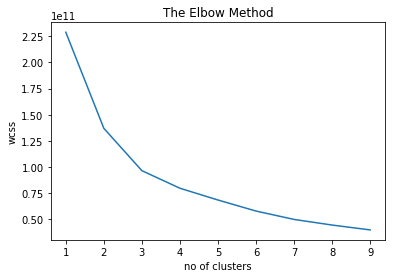

In [40]:
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

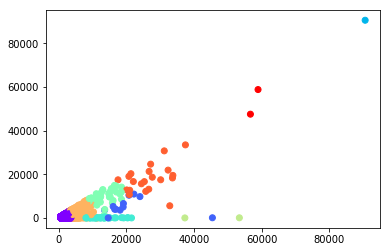

In [41]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_, cmap='rainbow') 

In [13]:
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

In [20]:
from sklearn.model_selection import train_test_split, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [24]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 80.32
Time consumed for training: 0.133 seconds
Time consumed for prediction: 0.18826 seconds


In [25]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8947 0.885  0.8929 0.8929 0.8839 0.8482 0.9107 0.8661 0.9196 0.875 ]
Mean: 0.8868978308603367
Standard Deviation: 0.019637309927525475
